<a href="https://colab.research.google.com/github/space-owner/Deep-Learning/blob/main/multi_label_classification_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Multi-Label Classification with Keras***
This post was written with reference to relative document for study purpose. [Link](https://towardsdatascience.com/multi-label-classification-and-class-activation-map-on-fashion-mnist-1454f09f5925) 

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
cd drive/MyDrive/Workspace/Data/Fashion_MNIST

/content/drive/MyDrive/Workspace/Data/Fashion_MNIST


In [98]:
import os
import numpy as np
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt
from imutils import paths

from sklearn.preprocessing import MultiLabelBinarizer
from keras.preprocessing.image import img_to_array
seed = 47

In [99]:
labels = pd.read_csv("labels.csv")

labels = labels.class_name.apply(
    lambda x: x.replace(" ", "").split(",")
).to_dict()
print(" >>> label count =", len(labels))

 >>> label count = 5000


In [100]:
dataset_dir = "images/"

image_paths = sorted(
    list(paths.list_images(dataset_dir))
)
print(" >>> train count =", len(image_paths))

 >>> train count = 5000


 >>> image name = images/47.png
 >>> image shape = (83, 334, 3)
 >>> image class =  Pullover,Ankleboot,Sandal,Bag


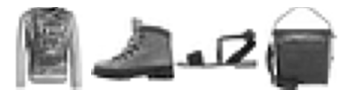

In [101]:
def show_image(image_number: int):
    image_name = "images/{}.png".format(image_number)
    print(" >>> image name =", image_name)

    image = cv.imread(image_name)
    print(" >>> image shape =", image.shape)

    plt.imshow(image)
    plt.axis('off')

show_image(seed)
print(" >>> image class = ", ",".join(labels[seed]))

In [ ]:
%%time

width, height = 640, 160

train_image = []
train_label = []
for image_path in image_paths:
    image = cv.imread(image_path)

    image = cv.resize(
        image, (width, height)
    )

    image_array = img_to_array(image)
    train_image.append(image_array)

    image_number = int(
        image_path.split(os.path.sep)[-1].split(".")[0]
    )
    train_label.append(labels[image_number])

train_image = np.array(train_image, dtype='float') / 255.0
train_label = np.array(train_label)

mlb = MultiLabelBinarizer()

train_label = mlb.fit_transform(train_label)

for (class_num, class_name) in enumerate(mlb.classes_):
    print(" >>> class {} = {}".format(
        class_num, class_name)
    )

In [ ]:
# TODO